In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


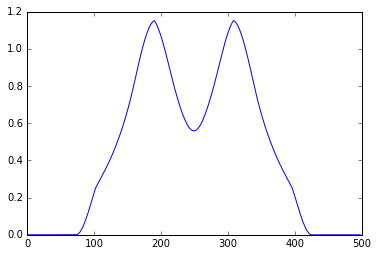

In [72]:
lambda_probe = 0.88E-6

shot = 1996
pixel = 215
resolution = 3.472 # um/pixel

#name="1939_125L.dat"
name = str(shot) + "_" + str(pixel) + ".dat"

def zPosition(shot,pixel,resolution):
    RunIndex = (shot + 1)//10 -194
    BasePosition = RunIndex*600.0/resolution # the step size was 600 um
    Z= (BasePosition + pixel)*resolution    
    return Z

def eDensity(name, lambda_probe, resolution):
    array=np.loadtxt(name,skiprows=1)
    length=len(array)
    pad = np.zeros((499-length)/2)
    array=np.concatenate([pad,array,pad])

    c_vac = 299792458
    epsilon0 = 8.854187817620E-12
    m_e = 9.10938356E-31
    q_e = 1.60217662E-19

    w_l = 2 * np.pi * c_vac / lambda_probe
    n_c = w_l**2 * epsilon0 * m_e / q_e**2 * 1E-24  # 1E18 cm^-3
    factor = -lambda_probe * n_c / np.pi * 1E6/resolution
    eDensity = np.asarray(array*factor)
    return eDensity


Z = zPosition(shot,pixel,resolution)
eDens = eDensity(name, lambda_probe, resolution)
plt.plot(eDens)